In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv',usecols = ['X1','X2','X3','X4','X5','X6'])
df.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [ ]:
for col in df.columns:
  print(col , ': ', len(df[col].unique()),'labels')

X1 :  27 labels
X2 :  44 labels
X3 :  7 labels
X4 :  4 labels
X5 :  29 labels
X6 :  12 labels


In [ ]:
pd.get_dummies(df,drop_first=True).shape

(4209, 117)

In [ ]:
df.X2.value_counts().sort_values(ascending = False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [ ]:
top_10 = [x for x in df.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [ ]:
def on_hot_top(df,var,top_x_var):
  for label in top_x_var:
    df[var + label] = np.where(df[var]==label,1,0)

df = pd.read_csv('train.csv',usecols = ['X1','X2','X3','X4','X5','X6'])
on_hot_top(df,'X2',top_10)
df.head()

,X1,X2,X3,X4,X5,X6,X2as,X2ae,X2ai,X2m,X2ak,X2r,X2n,X2s,X2f,X2e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


Ordinal Encoding

In [ ]:
 import pandas as pd
 import datetime

In [ ]:
df_base = datetime.datetime.today()
df_base

datetime.datetime(2021, 2, 3, 20, 0, 18, 687363)

In [ ]:
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0,20)]
#df_date_list
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df

,day
0,2021-02-03 20:00:18.687363
1,2021-02-02 20:00:18.687363
2,2021-02-01 20:00:18.687363
3,2021-01-31 20:00:18.687363
4,2021-01-30 20:00:18.687363
5,2021-01-29 20:00:18.687363
6,2021-01-28 20:00:18.687363
7,2021-01-27 20:00:18.687363
8,2021-01-26 20:00:18.687363
9,2021-01-25 20:00:18.687363


In [ ]:
df['day_week'] = df['day'].dt.day_name()
df.head()

,day,day_week
0,2021-02-03 20:00:18.687363,Wednesday
1,2021-02-02 20:00:18.687363,Tuesday
2,2021-02-01 20:00:18.687363,Monday
3,2021-01-31 20:00:18.687363,Sunday
4,2021-01-30 20:00:18.687363,Saturday


In [ ]:
weekday_map = {'Monday' : 1,
                'Tuesday' : 2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7}

df['day_ordinal'] = df.day_week.map(weekday_map)

In [ ]:
df.head()

,day,day_week,day_ordinal
0,2021-02-03 20:00:18.687363,Wednesday,3
1,2021-02-02 20:00:18.687363,Tuesday,2
2,2021-02-01 20:00:18.687363,Monday,1
3,2021-01-31 20:00:18.687363,Sunday,7
4,2021-01-30 20:00:18.687363,Saturday,6


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Mean/Median/Mode Imputation

In [ ]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

df['cabin_null'].mean()

0.7710437710437711

In [ ]:
 df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [ ]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(df,var,median):
  df[var + "_med"]  = df[var].fillna(median)

In [ ]:
median = df.Age.median()
median

28.0

In [ ]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_med
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
df.Age_med.isnull().sum()

0

In [ ]:
print(df['Age'].std())
print(df['Age_med'].std())

14.526497332334044
13.019696550973194


In [ ]:
 import matplotlib.pyplot as plt
 %matplotlib inline

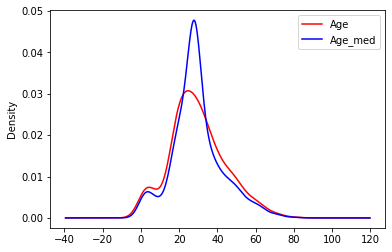

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde' , ax = ax,color = 'red') ###kde = kernel density estimator
df.Age_med.plot(kind = 'kde'  ,ax = ax,color = 'blue')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

Random Sample Imputation

In [ ]:
import pandas as pd
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df.Age.dropna().sample()

296    23.5
Name: Age, dtype: float64

In [ ]:
df.Age.dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [ ]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
def impute_nan(df,var,median):
  df[var+"_median"] = df[var].fillna(median)
  df[var+"_random"]  = df[var]
  random_sample = df[var].dropna().sample(df[var].isnull().sum(),random_state=0)
  random_sample.index = df[df[var].isnull()].index
  df.loc[df[var].isnull(),var+"_random"] = random_sample

In [ ]:
median = df.Age.median()
median

28.0

In [ ]:
impute_nan(df,"Age",median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

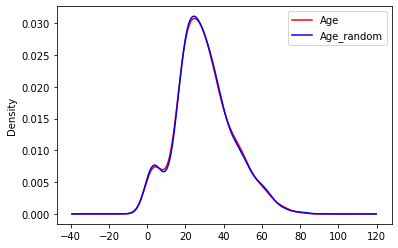

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde' , ax = ax,color = 'red') ###kde = kernel density estimator
df.Age_random.plot(kind = 'kde'  ,ax = ax,color = 'blue')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

Capturing NAN value with a new feature

In [ ]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [ ]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


End of Distribution Imputation

In [ ]:
 df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


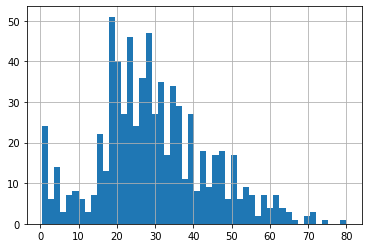

In [ ]:
 df.Age.hist(bins=50)

In [ ]:
extreme = df.Age.mean() + 3*df.Age.std()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


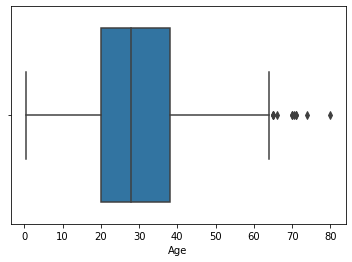

In [ ]:
import seaborn as sns ## taken right side because right side contain outlier
sns.boxplot('Age',data=df)

In [ ]:
def impute_nan(df,var,median,extreme):
  df[var+"_end_distribution"] = df[var].fillna(extreme)
  df[var].fillna(median,inplace = True)

In [ ]:
impute_nan(df,"Age",df.Age.median(),extreme)
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


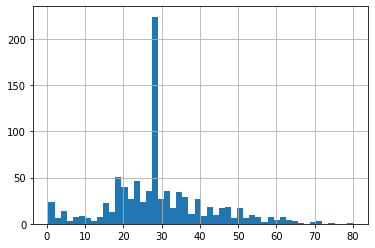

In [ ]:
df["Age"].hist(bins=50)

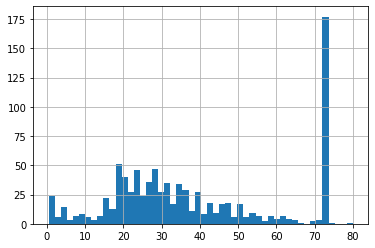

In [ ]:
df["Age_end_distribution"].hist(bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


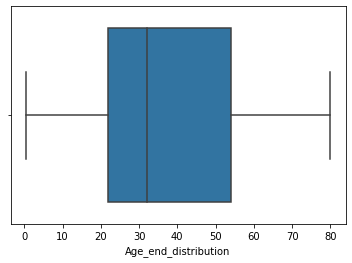

In [ ]:
sns.boxplot("Age_end_distribution",data = df)###outliers has been captured

Arbitrary Imputation

In [ ]:
df = pd.read_csv('train.csv',usecols = ["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df,var):
  df[var+'_zero'] = df[var].fillna(0)
  df[var+'_hundred'] = df[var].fillna(100)

Handle categorical missing values
Frequent Category Imputation

In [ ]:
from google.colab import files
files.upload()

Saving train (1).csv to train (1).csv


{'train (1).csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df = pd.read_csv('loan.csv',usecols = ["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

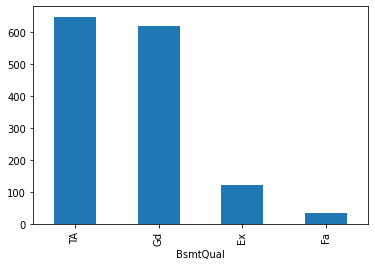

In [ ]:
###compute the freq with every features
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar()

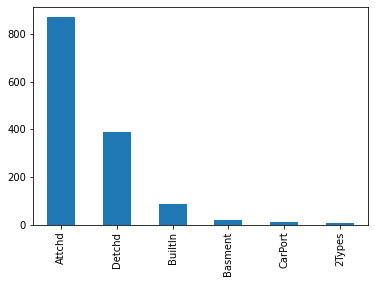

In [ ]:
df['GarageType'].value_counts().plot.bar()

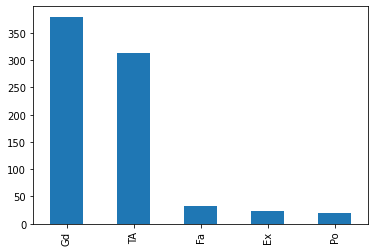

In [ ]:
df['FireplaceQu'].value_counts().plot.bar()

In [ ]:
def impute_nan(df,var):
  most_freq_category = df[var].value_counts().index[0]
  df[var].fillna(most_freq_category,inplace = True)

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

Adding a variable to capture NAN

In [ ]:
df = pd.read_csv('loan.csv',usecols = ["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
import numpy as np
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace = True)

In [ ]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace = True)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


suppose if you have more frequent categories , we just replace NAN with a new category


In [ ]:
import pandas as pd
df = pd.read_csv('loan.csv',usecols = ["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
import numpy as np
def impute_nan(df,var):
  df[var+"new_var"] = np.where(df[var].isnull(),"Missing",df[var])

In [ ]:
for feature in  ["BsmtQual","FireplaceQu","GarageType"]:
  impute_nan(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnew_var,FireplaceQunew_var,GarageTypenew_var
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [ ]:
df.drop( ["BsmtQual","FireplaceQu","GarageType"],axis=1)

,SalePrice,BsmtQualnew_var,FireplaceQunew_var,GarageTypenew_var
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


One Hot Encoding

In [ ]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df = pd.read_csv('train.csv',usecols = ['Sex'])

In [ ]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [ ]:
df = pd.read_csv('train.csv',usecols = ['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df.dropna(inplace=True)

In [ ]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


One Hot Encoding with many categories in a feature

In [ ]:
df = pd.read_csv('mercedes.csv',usecols = ['X0','X1','X2','X3','X4','X5','X6'])

In [ ]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [ ]:
df['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
l      16
aw     16
ad     14
b      11
k      11
au     11
as     10
r      10
bc      6
ao      4
c       3
q       2
aa      2
ab      1
ac      1
g       1
Name: X0, dtype: int64

In [ ]:
for i in df.columns:
  print(len(df[i].unique()))

47
27
44
7
4
29
12


In [ ]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [ ]:
list_10 = df.X1.value_counts().sort_values(ascending=False).head(10).index
list_10 = list(list_10)
list_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [ ]:
for categories in list_10:
  df[categories] = np.where(df['X1']==categories,1,0)

In [ ]:
list_10.append('X1')
df[list_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


Ordinal Number Encoding(done above)
Count or Frequency Encoding

In [ ]:
train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None,index_col=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
len(train[1].unique())

9

In [ ]:
columns = [1,3,5,6,7,8,9,13]
train = train[columns]

In [ ]:
train.columns = ['Employment','Degree','Status','Designation','Family_Job','Race','Sex','Country']

In [ ]:
train.head()

,Employment,Degree,Status,Designation,Family_Job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [ ]:
for col in train.columns[:]:
  print(col , ":" , len(train[col].unique()),"labels")

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
Family_Job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [ ]:
j=0
for i in range(len(train['Country'])):
  if train['Country'][i] == ' ?':
    j=1
    train['Country'][i] = "Others"
j

1

In [ ]:
train['Country']=np.where(train['Country']==" ?","Others",train['Country'])

In [ ]:
train['Country'].value_counts()

 United-States                 29170
 Mexico                          643
Others                           583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
mapping = train.Country.value_counts().to_dict()

In [ ]:
train['Country'] = train['Country'].map(mapping)

In [ ]:
train.head()

,Employment,Degree,Status,Designation,Family_Job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


DisAdv : It will provide same weight if the frequencies are same.

Target Guided Ordinal Encoding
1. Ordering the labels according to the target.
2. Replace the labels by the joint probability of being 1 or 0.

In [ ]:
df = pd.read_csv('titanic.csv',usecols = ['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df.Cabin.fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [ ]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [ ]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [ ]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [ ]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'A': 2, 'B': 6, 'C': 4, 'D': 8, 'E': 7, 'F': 5, 'G': 3, 'M': 1, 'T': 0}

In [ ]:
df['Cabin_ordinal'] = df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


Probability Ratio Encoding

In [ ]:
import pandas as pd
from google.colab import files 

In [ ]:
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df = pd.read_csv('titanic.csv',usecols = ['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df['Cabin'].fillna('Missing',inplace = True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [ ]:
 df.Cabin.unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [ ]:
df.Cabin = df['Cabin'].astype(str).str[0]

In [ ]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [ ]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [ ]:
prob_df['Died'] = 1 - prob_df['Survived']
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [ ]:
prob_df['Prob_ratio'] = prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Prob_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [ ]:
prob_encoded = prob_df['Prob_ratio'].to_dict()
df['Cabin_encoded'] = df['Cabin'].map(prob_encoded)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


Types of tranformation :<br>
1.Normalisation And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling to Median And Quantiles
4. Gaussian Transformation , Logarithmic Tranformation , Reciprocal Transformation , Sqaure Root , Transformation Exponential Transformation , Box Cox Transformation. 

In [ ]:
df = pd.read_csv('titanic.csv',usecols = ['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
df['Age'].fillna(df.Age.median(),inplace = True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

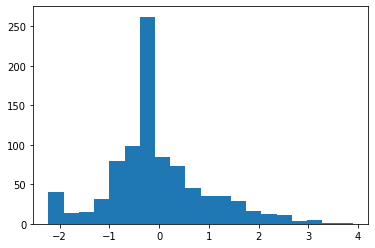

In [ ]:
plt.hist(df_scaled[:,2],bins=20)

Min-Max Scaling

In [ ]:
 from sklearn.preprocessing import MinMaxScaler
 min_max = MinMaxScaler()
 df_minmax = pd.DataFrame(min_max.fit_transform(df),columns = df.columns)
 df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

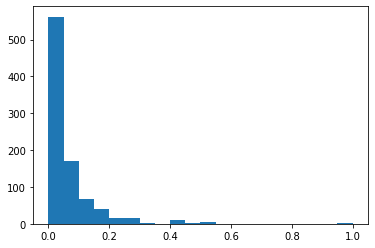

In [ ]:
plt.hist(df_minmax['Fare'],bins=20)

Robust Scaler

In [ ]:
 from sklearn.preprocessing import RobustScaler
 scaler = RobustScaler()
 df_robust = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
 df_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

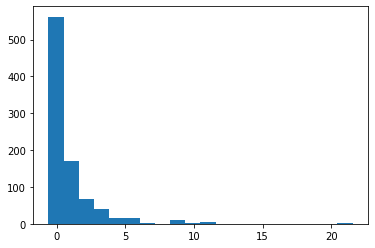

In [ ]:
plt.hist(df_robust['Fare'],bins=20)

Gaussian Transformation

In [ ]:
 df = pd.read_csv('titanic.csv',usecols = ['Survived','Age','Fare'])
 df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.Age.fillna(df.Age.median(),inplace=True)

In [ ]:
###check whether feature is gaussian or normally distributed use Q-Q plot
import scipy.stats as stat
import pylab

In [ ]:
def plot_data(df,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(df[feature],dist='norm',plot=pylab)
  plt.show()

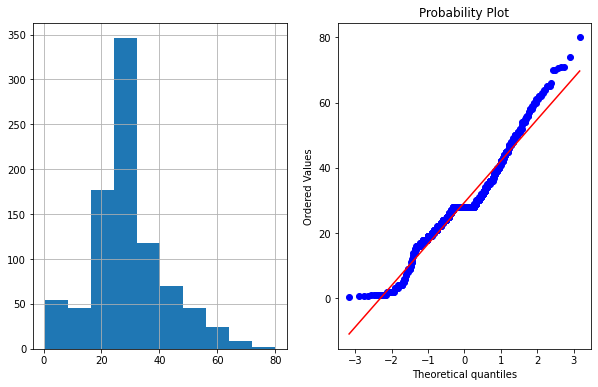

In [ ]:
plot_data(df,'Age') ###if all points fall on a single line then it is normally distributed


Logarithmic Transform

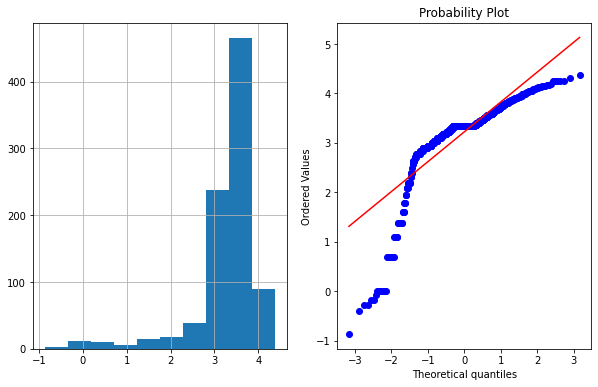

In [ ]:
import numpy as np
df['Age_log'] = np.log(df['Age'])
plot_data(df,'Age_log')

Reciprocal Tranformation

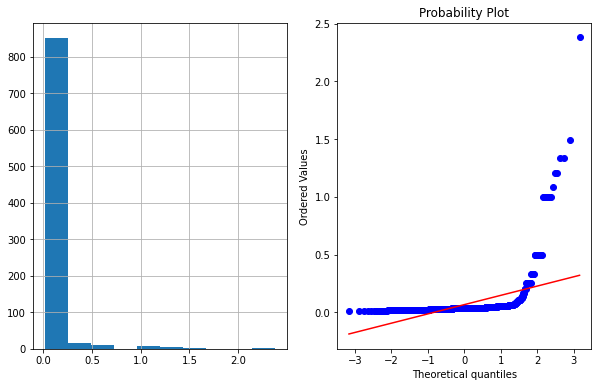

In [ ]:
df['Age_reciprocal'] = 1/df['Age']
plot_data(df,'Age_reciprocal')

Sqaure Root Transform

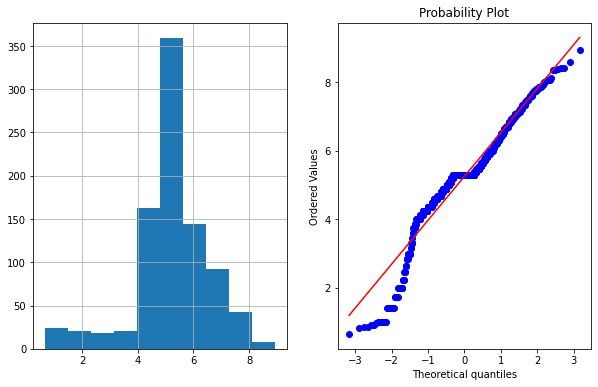

In [ ]:
df['Age_square'] = df.Age**(1/2)
plot_data(df,'Age_square')

Exponential Transform

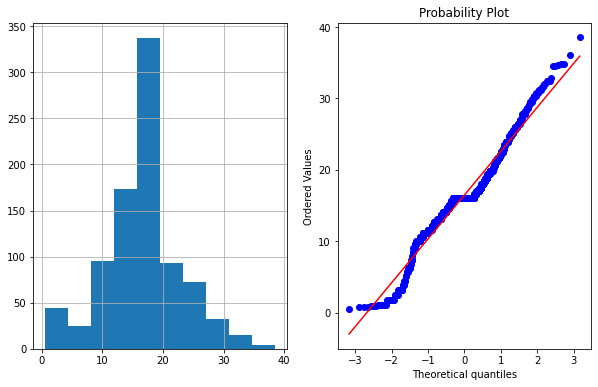

In [ ]:
df['Age_expo'] = df['Age']**(1/1.2)
plot_data(df,'Age_expo')

Box-Cox Transform

In [ ]:
df['Age_boxcox'],parameters = stat.boxcox(df.Age)

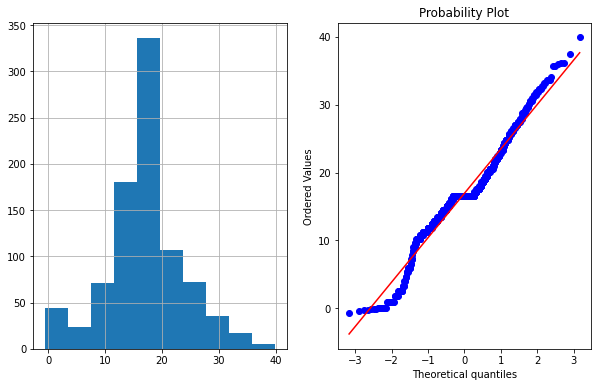

In [ ]:
plot_data(df,'Age_boxcox')

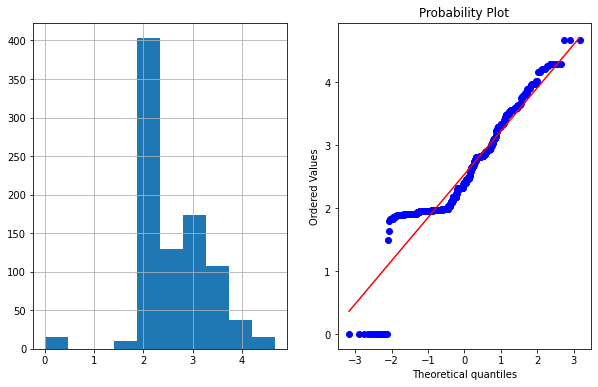

In [ ]:
df['Fare_boxcox'],parameters = stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_boxcox')

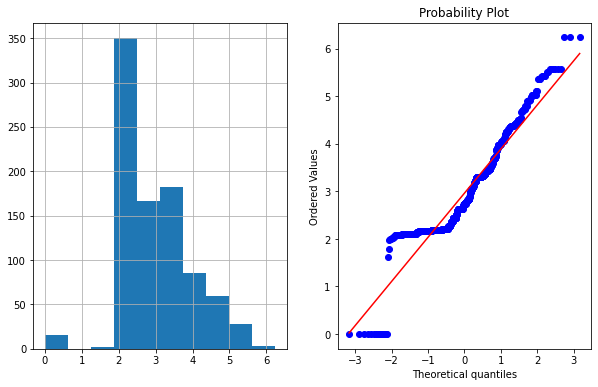

In [ ]:
df['Fare_log'] = np.log1p(df['Fare'])
plot_data(df,'Fare_log')

Handling Imbalanced Dataset

In [ ]:
!pip install imbalanced-learn

In [ ]:
from google.colab import files
files.upload()

Saving creditcard.csv to creditcard (2).csv


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

UnderSampling

In [ ]:
x = df.drop("Class",axis = 1)
y = df.Class

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold , train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7)

In [ ]:
log_class = LogisticRegression()
grid = {'C':10.0 **np.arange(-2,3),'penalty' : ['l1','l2']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)

For Imbalanced Dataset go for CrossValidation and Hyper Parameter Tuning.
And for imbalanced dataset don't settle yourself if accuracy comes good , check for precision , recall

In [ ]:
clf = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85251    49]
 [   46    97]]
0.9988881476539916
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85300
           1       0.66      0.68      0.67       143

    accuracy                           1.00     85443
   macro avg       0.83      0.84      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
class_weight = {0:1,1:100}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight=class_weight)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Usually for imbalanced datasets ensemble technique always gives good results

In [ ]:
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85297     3]
 [   34   109]]
0.9995669627705019
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85300
           1       0.97      0.76      0.85       143

    accuracy                           1.00     85443
   macro avg       0.99      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443



UnderSampling

In [ ]:
y_train.value_counts()

0    199015
1       349
Name: Class, dtype: int64

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 199015, 1: 349})

In [ ]:
from imblearn.under_sampling import NearMiss
ns = NearMiss(0.8)
x_train_ns,y_train_ns = ns.fit_sample(x_train,y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fitCounter({0: 199015, 1: 349})
The number of classes after fitCounter({0: 436, 1: 349})


In [ ]:
349/436

0.8004587155963303

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(x_train_ns,y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[52991 32309]
 [    5   138]]
0.621806350432452
              precision    recall  f1-score   support

           0       1.00      0.62      0.77     85300
           1       0.00      0.97      0.01       143

    accuracy                           0.62     85443
   macro avg       0.50      0.79      0.39     85443
weighted avg       1.00      0.62      0.77     85443



OverSampling

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
os = RandomOverSampler(0.5)
x_train_os,y_train_os = os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))


The number of classes before fit Counter({0: 199015, 1: 349})
The number of classes after fit Counter({0: 199015, 1: 99507})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
classifier = RandomForestClassifier()
classifier.fit(x_train_os,y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85297     3]
 [   31   112]]
0.999602073897218
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85300
           1       0.97      0.78      0.87       143

    accuracy                           1.00     85443
   macro avg       0.99      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
os = SMOTETomek(0.75)
x_train_os,y_train_os = os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 199015, 1: 349})
The number of classes after fit Counter({0: 198266, 1: 148512})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
classifier = RandomForestClassifier()
classifier.fit(x_train_os,y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85287    13]
 [   28   115]]
0.9995201479348805
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85300
           1       0.90      0.80      0.85       143

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Ensemble Technique

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24

In [ ]:
easy = EasyEnsembleClassifier()
easy.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

EasyEnsembleClassifier(base_estimator=None, n_estimators=10, n_jobs=1,
                       random_state=None, replacement=False,
                       sampling_strategy='auto', verbose=0, warm_start=False)

In [ ]:
y_pred = easy.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[82203  3097]
 [   11   132]]
0.9636248727221657
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85300
           1       0.04      0.92      0.08       143

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443



Discussion related with outliers and impact on machine learning

In [ ]:
from google.colab import files
files.upload()
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.Age.isnull().sum()

177

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


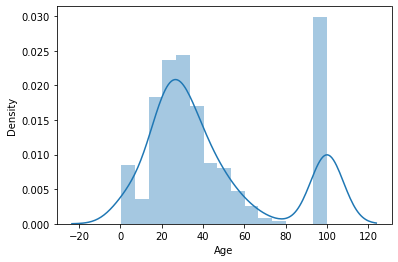

In [ ]:
import seaborn as sns
sns.distplot(df.Age.fillna(100))

Text(0, 0.5, 'No. of passenger')

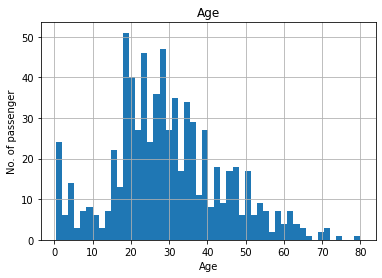

In [ ]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of passenger')

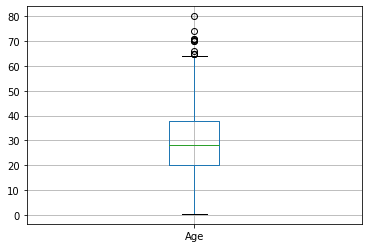

In [ ]:
figure = df.boxplot(column='Age')

In [ ]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
###Assuming Age follows a gaussian distribution we will calculate the boundaries which differentiates the outliers
upper_boundary = df['Age'].mean() + 3*df.Age.std()
lower_boundary = df['Age'].mean() - 3*df.Age.std()
print(upper_boundary)
print(lower_boundary)
print(df.Age.mean())

73.27860964406095
-13.88037434994331
29.69911764705882


Below this is applied mainly for skewed data

In [ ]:
###lets compute the interquantile range to calculate the boundaries outside which is a outlier
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)

In [ ]:
IQR

17.875

In [ ]:
 ###calculating outliers so based on 1.5 above 64 is a outlier
 lower_bridge = df.Age.quantile(0.25) - IQR*1.5
 upper_bridge = df.Age.quantile(0.75) + IQR*1.5
 print(lower_bridge)
 print(upper_bridge)

-6.6875
64.8125


In [ ]:
###extreme outlier
lower_bridge = df.Age.quantile(0.25) - IQR*3
upper_bridge = df.Age.quantile(0.75) + IQR*3
print(lower_bridge)
print(upper_bridge)

-33.5
91.625


feature is skewed 

Text(0, 0.5, 'No of passenger')

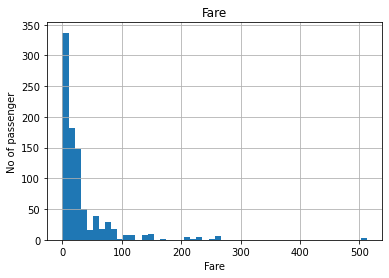

In [ ]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

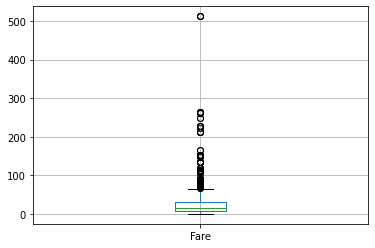

In [ ]:
figure = df.boxplot(column='Fare')

In [ ]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [ ]:
lower_bridge = df.Fare.quantile(0.25) - IQR*1.5
upper_bridge = df.Fare.quantile(0.75) + IQR*1.5
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [ ]:
lower_bridge = df.Fare.quantile(0.25) - IQR*3
upper_bridge = df.Fare.quantile(0.75) + IQR*3
print(lower_bridge)
print(upper_bridge) ###ignore negative

-61.358399999999996
100.2688


In [ ]:
data = df.copy()

In [ ]:
data.loc[df.Age>73,'Age'] = 73

In [ ]:
import numpy as np
data.Age = np.where(df.Age>73,73,df.Age)

In [ ]:
data.loc[df.Fare>100,'Fare'] = 100

Text(0, 0.5, 'No of passenger')

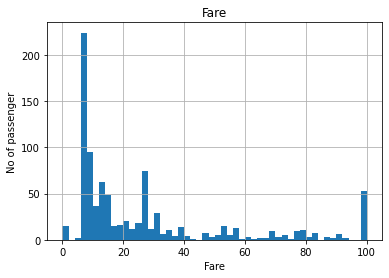

In [ ]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

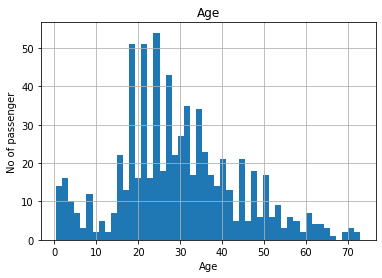

In [ ]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.7)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Acc. Score : {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score : {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Acc. Score : 0.6794871794871795
roc_auc_score : 0.7059589494592805


In [ ]:
y_pred1

array([[0.70418896, 0.29581104],
       [0.28349748, 0.71650252],
       [0.6477518 , 0.3522482 ],
       ...,
       [0.69459436, 0.30540564],
       [0.68340805, 0.31659195],
       [0.50221948, 0.49778052]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Acc. Score : {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score : {}".format(roc_auc_score(y_test,y_pred1[:,1])))


Acc. Score : 0.6682692307692307
roc_auc_score : 0.7013849039947031
